In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('predictive_maintenance_dirty_dataset.csv')

In [3]:
df.shape

(305, 7)

In [4]:
df.head()

,Timestamp,Machine_ID,Temperature,Vibration,Pressure,Rotation_Speed,Failure
0,2025-08-01 00:33:00,PUMP_003,47.2 C,~2.26,314.738608,1534.211253,0
1,2025-08-01 01:08:00,PUMP_003,57.896064077536955,2.3837173645764542,NaN,NaN,0
2,2025-08-01 02:04:00,pump-001,51.20981135783017,1.043359877671101,292.750822,1485.942812,False
3,2025-08-01 03:02:00,PUMP_004,45.45987962239394,1.2938481493323541,324.656488,1494.355592,0
4,2025-08-01 03:25:00,PUMP_003,49.87772411252967,2.1777756585612162,314.170111,1520.811546,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Timestamp       305 non-null    object 
 1   Machine_ID      305 non-null    object 
 2   Temperature     276 non-null    object 
 3   Vibration       275 non-null    object 
 4   Pressure        275 non-null    float64
 5   Rotation_Speed  275 non-null    float64
 6   Failure         305 non-null    object 
dtypes: float64(2), object(5)
memory usage: 16.8+ KB


In [6]:
df.isnull().sum()

Timestamp          0
Machine_ID         0
Temperature       29
Vibration         30
Pressure          30
Rotation_Speed    30
Failure            0
dtype: int64

In [7]:
df['Machine_ID'].unique()

array(['PUMP_003', 'pump-001', 'PUMP_004', 'Pump_002'], dtype=object)

In [8]:
df.duplicated().value_counts()

False    300
True       5
Name: count, dtype: int64

In [9]:
df['Failure'].unique()

array(['0', 'False', 'Error', 'True', '1'], dtype=object)

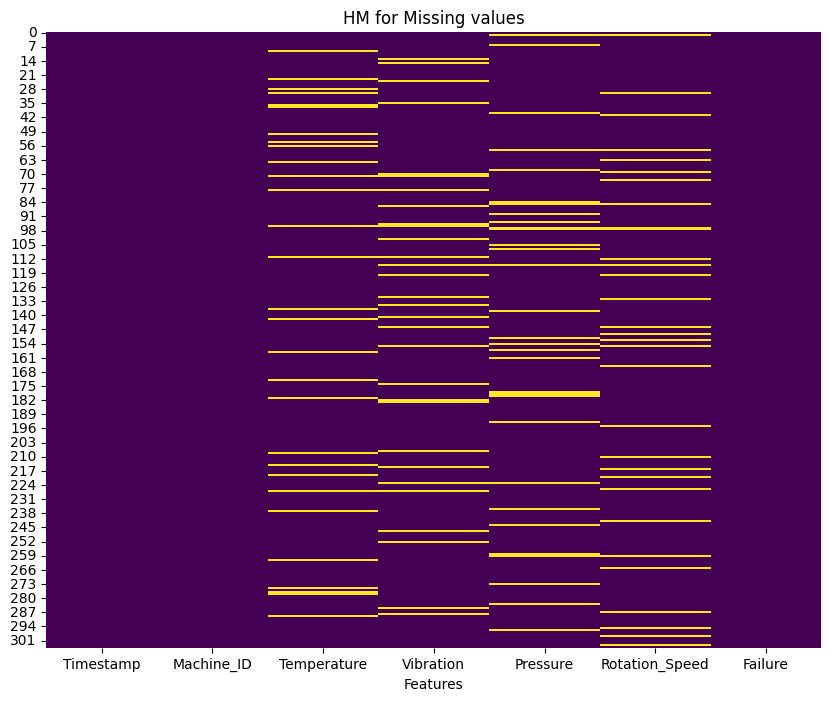

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('HM for Missing values')
plt.xlabel('Features')
plt.show()

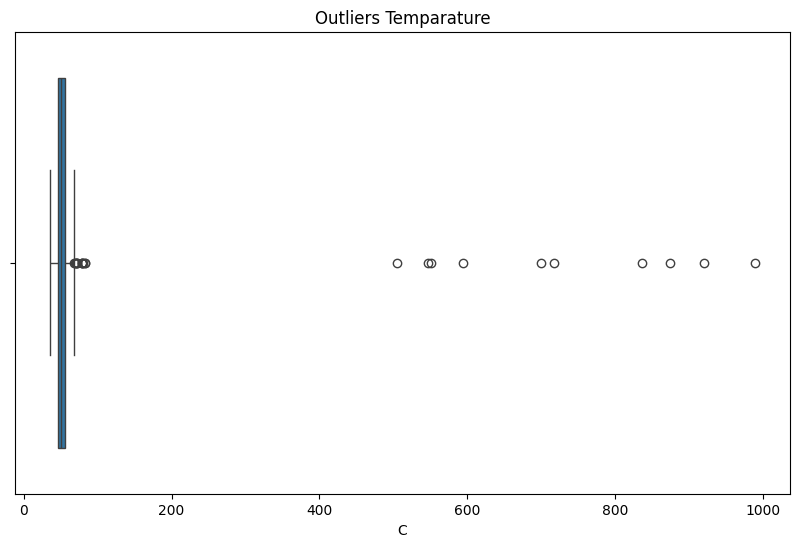

In [11]:
temp_numeric = pd.to_numeric(df['Temperature'].astype(str).str.extract(r'(-?\d+\.?\d*)').iloc[:, 0], errors='coerce') # Tạm thời chuyển đổi trước để visualize
plt.figure(figsize=(10, 6))
sns.boxplot(x=temp_numeric)
plt.title('Outliers Temparature')
plt.xlabel('C')
plt.show()

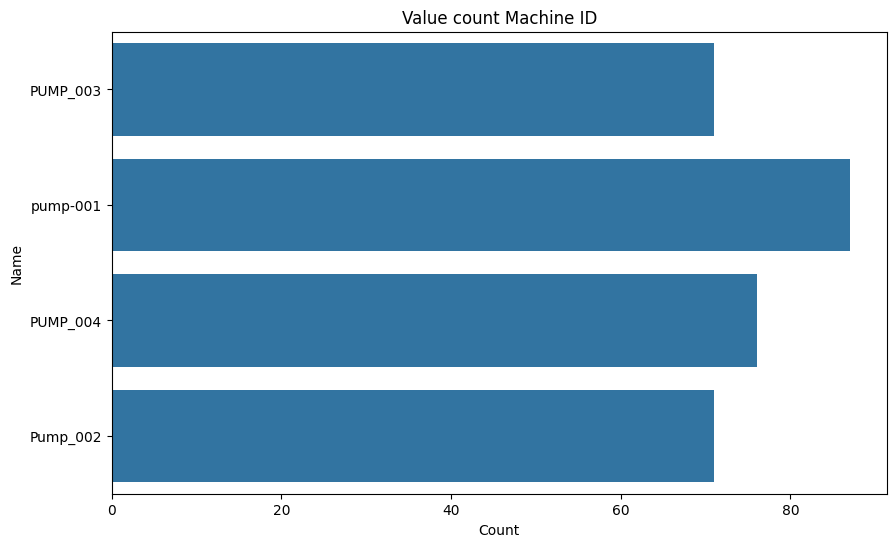

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(y=df['Machine_ID'])
plt.title('Value count Machine ID')
plt.xlabel('Count')
plt.ylabel('Name')
plt.show()

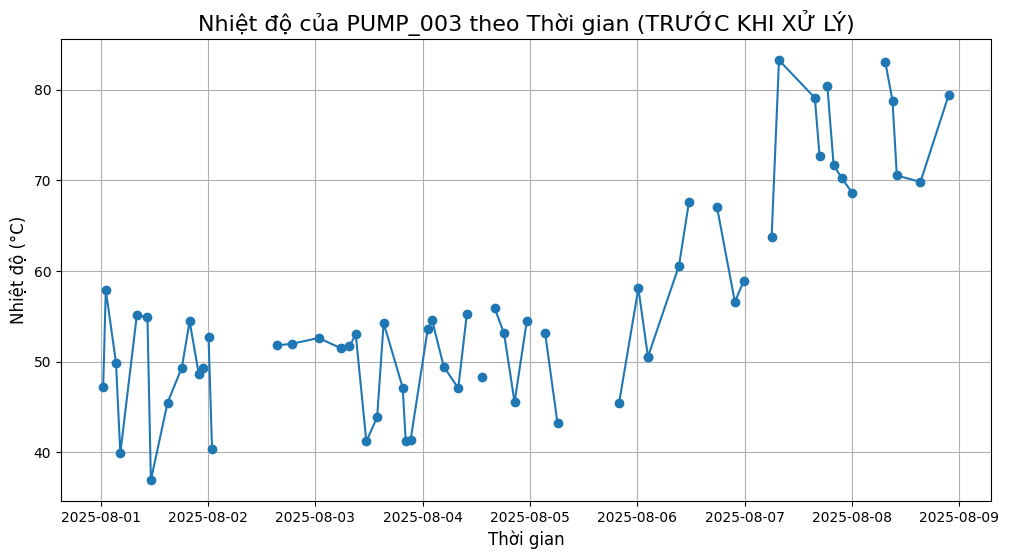

In [13]:
# TẠM THỜI chuyển đổi Timestamp và Temperature để vẽ
df_for_plot = df.copy()
df_for_plot['Timestamp'] = pd.to_datetime(df_for_plot['Timestamp'], errors='coerce')
df_for_plot['Temperature'] = pd.to_numeric(df_for_plot['Temperature'].astype(str).str.extract(r'(-?\d+\.?\d*)').iloc[:, 0], errors='coerce')

# Lọc ra chỉ một máy để biểu đồ được rõ ràng
machine_to_plot = 'PUMP_003'
df_machine_before = df_for_plot[df_for_plot['Machine_ID'].str.upper().str.replace('-', '_') == machine_to_plot].sort_values('Timestamp')

# Thiết lập kích thước biểu đồ
plt.figure(figsize=(12, 6))

# Vẽ biểu đồ đường, thêm marker='o' để thấy rõ các điểm dữ liệu rời rạc
plt.plot(df_machine_before['Timestamp'], df_machine_before['Temperature'], marker='o', linestyle='-')

# Đặt tiêu đề và nhãn
plt.title(f'Nhiệt độ của {machine_to_plot} theo Thời gian (TRƯỚC KHI XỬ LÝ)', fontsize=16)
plt.xlabel('Thời gian', fontsize=12)
plt.ylabel('Nhiệt độ (°C)', fontsize=12)
plt.grid(True) # Thêm lưới để dễ nhìn

# Hiển thị biểu đồ
plt.show()

## Cleaning

In [14]:
df_pre = df.copy()

In [15]:
len(df_pre)

305

In [16]:
#duplicate
df_pre.drop_duplicates(inplace=True)

In [17]:
len(df_pre)

300

In [18]:
# array(['PUMP_003', 'pump-001', 'PUMP_004', 'Pump_002'], dtype=object)

df_pre['Machine_ID'] = df_pre['Machine_ID'].str.upper().str.replace('-', '_')

In [19]:
df_pre['Machine_ID'].unique()

array(['PUMP_003', 'PUMP_001', 'PUMP_004', 'PUMP_002'], dtype=object)

In [20]:
df_pre['Failure'].unique()

array(['0', 'False', 'Error', 'True', '1'], dtype=object)

In [21]:
failure_mapp = {
    "True": 1, "False": 0,  # Dạng chữ
    True: 1, False: 0,      # Dạng boolean
    1: 1, 0: 0,              # Dạng số 
    "Error": np.nan
}
df_pre['Failure'] = df_pre['Failure'].map(failure_mapp)
df_pre['Failure'].unique()

array([nan,  0.,  1.])

In [22]:
df_pre['Timestamp'] = pd.to_datetime(df_pre['Timestamp'], errors='coerce') #errors='coerce' --> 'NaT' (Not a Time)

# 'Temperature', 'Vibration', 'Pressure', 'Rotation_Speed'
sen_cols = ['Temperature', 'Vibration', 'Pressure', 'Rotation_Speed']
for col in sen_cols:
    df_pre[col] = df_pre[col].astype(str).str.extract(r'(-?\d+\.?\d*)')
    df_pre[col] = pd.to_numeric(df_pre[col], errors='coerce')

In [23]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, 0 to 304
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Timestamp       300 non-null    datetime64[ns]
 1   Machine_ID      300 non-null    object        
 2   Temperature     272 non-null    float64       
 3   Vibration       270 non-null    float64       
 4   Pressure        270 non-null    float64       
 5   Rotation_Speed  270 non-null    float64       
 6   Failure         60 non-null     float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 18.8+ KB


In [24]:
df_pre.loc[df_pre['Temperature'] > 200, 'Temperature'] = np.nan #Nhiet do k the > 200
df_pre.loc[df_pre['Pressure'] < 0, 'Pressure'] = np.nan #Ap suat k the am
df_pre.loc[df_pre['Rotation_Speed'] > 5000, 'Rotation_Speed'] = np.nan

df_pre[sen_cols].describe()

,Temperature,Vibration,Pressure,Rotation_Speed
count,262.000000,270.000000,260.000000,260.000000
mean,51.092217,2.246899,310.597470,1499.262482
std,7.869146,1.094170,11.327990,28.782220
min,35.638689,0.670000,248.065831,1432.366464
25%,46.230233,1.662214,304.855203,1480.542214
50%,50.001369,2.058295,311.036886,1499.170234
75%,54.566366,2.444016,316.978270,1516.619563
max,83.256111,8.051040,336.997141,1639.505815


In [25]:
# interpolation 
df_for_resample = df_pre.copy()

# Từ giờ, tất cả các thao tác sẽ được thực hiện trên df_for_resample
df_for_resample.dropna(subset=['Timestamp'], inplace=True)
df_for_resample = df_for_resample.sort_values(by=['Machine_ID', 'Timestamp'])
df_for_resample.set_index('Timestamp', inplace=True)

# Chuẩn bị để xử lý từng máy một
categorical_cols = ['Machine_ID', 'Failure']
clean_dfs = [] # Một danh sách để lưu các báo cáo đã sạch của từng máy

for machine_id in df_for_resample['Machine_ID'].unique():
    if pd.isna(machine_id): continue
        
    df_machine = df_for_resample[df_for_resample['Machine_ID'] == machine_id].copy()
    
    # Tái cấu trúc và tính trung bình cho các cột số
    df_numeric = df_machine[sen_cols].resample('30T').mean()
    # Dùng nội suy để lấp đầy các khoảng trống một cách mượt mà
    df_numeric.interpolate(method='linear', limit_direction='both', inplace=True)
    
    # Xử lý các cột phân loại theo logic khác
    df_categorical = df_machine[categorical_cols].resample('30T').first()
    df_categorical['Failure'] = df_machine['Failure'].resample('30T').max()
    df_categorical.fillna(method='ffill', inplace=True) # Điền tới cho các cột này
    
    # Ghép hai phần đã xử lý lại với nhau
    df_machine_clean = pd.concat([df_numeric, df_categorical], axis=1)
    
    clean_dfs.append(df_machine_clean)

# Ghép báo cáo của tất cả các máy lại
df_clean = pd.concat(clean_dfs)

# Hoàn thiện những chi tiết cuối cùng
df_clean['Failure'] = df_clean['Failure'].fillna(0).round().astype(int)
df_clean.reset_index(inplace=True) # Đưa Timestamp về lại làm một cột thông thường

In [26]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Timestamp       1468 non-null   datetime64[ns]
 1   Temperature     1468 non-null   float64       
 2   Vibration       1468 non-null   float64       
 3   Pressure        1468 non-null   float64       
 4   Rotation_Speed  1468 non-null   float64       
 5   Machine_ID      1468 non-null   object        
 6   Failure         1468 non-null   int32         
dtypes: datetime64[ns](1), float64(4), int32(1), object(1)
memory usage: 74.7+ KB


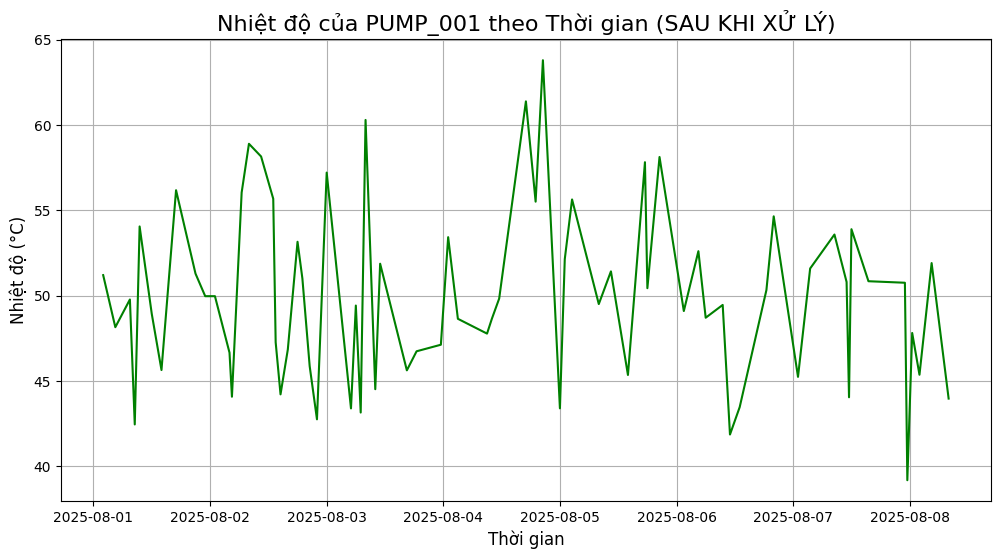

In [27]:
machine_to_plot = 'PUMP_001'
# Bây giờ, vẽ biểu đồ từ DataFrame df_clean
df_machine_after = df_clean[df_clean['Machine_ID'] == machine_to_plot]

# Thiết lập kích thước biểu đồ
plt.figure(figsize=(12, 6))

# Vẽ biểu đồ đường
plt.plot(df_machine_after['Timestamp'], df_machine_after['Temperature'], color='green')

# Đặt tiêu đề và nhãn
plt.title(f'Nhiệt độ của {machine_to_plot} theo Thời gian (SAU KHI XỬ LÝ)', fontsize=16)
plt.xlabel('Thời gian', fontsize=12)
plt.ylabel('Nhiệt độ (°C)', fontsize=12)
plt.grid(True)

# Hiển thị biểu đồ
plt.show()

## Feature Engineering

In [28]:
df_featured = df_clean.copy()
df_featured = df_featured.sort_values(by=['Machine_ID', 'Timestamp'])
df_featured.set_index('Timestamp', inplace=True)

In [29]:
window_size_6h = 12 #6h*60p 30p/1 point

new_cols = {
    'temp_rol_mean_6h': np.nan,
    'pressure_rol_std_6h': np.nan,
}

for col in new_cols:
    df_featured[col] = new_cols[col]

for mach_id in df_featured['Machine_ID'].unique():
    machine_ind = df_featured[df_featured['Machine_ID'] == mach_id].index
    df_featured.loc[machine_ind, 'temp_rol_mean_6h'] = df_featured.loc[machine_ind, 'Temperature'].rolling(window=window_size_6h, min_periods=1).mean()
    df_featured.loc[machine_ind, 'pressure_rol_std_6h'] = df_featured.loc[machine_ind, 'Pressure'].rolling(window=window_size_6h, min_periods=1).std()

In [30]:
#Lag Feature
lag_1h = 2

for mach_id in df_featured['Machine_ID'].unique():
    machine_ind = df_featured[df_featured['Machine_ID'] == mach_id].index

    #shift đẩy dữ liệu xuống
    df_featured.loc[machine_ind, 'temp_lag_1h'] = df_featured.loc[machine_ind, 'Temperature'].shift(lag_1h)
    df_featured.loc[machine_ind, 'vib_lag_1h'] = df_featured.loc[machine_ind, 'Vibration'].shift(lag_1h)


In [63]:
df_featured.dropna(inplace=True)

df_featured.reset_index(inplace=True)

df_featured.head()

,index,Timestamp,Temperature,Vibration,Pressure,Rotation_Speed,Machine_ID,Failure,temp_rol_mean_6h,pressure_rol_std_6h,temp_lag_1h,vib_lag_1h
0,0,2025-08-01 02:00:00,51.209811,1.043360,292.750822,1485.942812,PUMP_001,0,53.049339,10.937438,57.896064,2.383717
1,1,2025-08-01 02:30:00,50.599678,1.272244,292.897959,1486.708990,PUMP_001,0,52.780654,11.229054,51.209811,1.043360
2,2,2025-08-01 03:00:00,49.989545,1.501129,293.045096,1487.475168,PUMP_001,0,49.989545,15.773402,49.877724,2.177776
3,3,2025-08-01 03:30:00,49.379412,1.730013,293.192234,1488.241346,PUMP_001,0,48.676640,15.773402,49.877724,2.177776
4,4,2025-08-01 04:00:00,48.769279,1.958898,293.339371,1489.007524,PUMP_001,0,47.700335,14.443060,44.872063,2.368744


In [64]:
df_featured.columns

Index(['index', 'Timestamp', 'Temperature', 'Vibration', 'Pressure',
       'Rotation_Speed', 'Machine_ID', 'Failure', 'temp_rol_mean_6h',
       'pressure_rol_std_6h', 'temp_lag_1h', 'vib_lag_1h'],
      dtype='object')

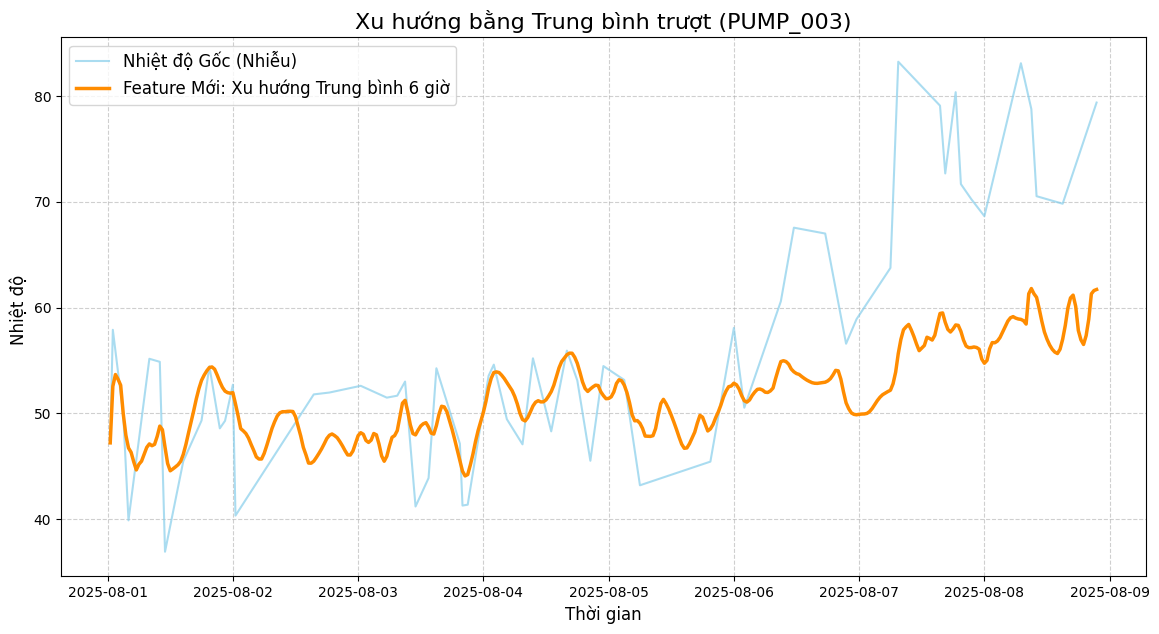

In [65]:
machine_to_plot = 'PUMP_003'
df_mach_viz = df_featured[df_featured['Machine_ID'] ==  machine_to_plot]

plt.figure(figsize=(14, 7))

plt.plot(df_mach_viz['Timestamp'], df_mach_viz['Temperature'], 
         label='Nhiệt độ Gốc (Nhiễu)', color='skyblue', alpha=0.7)

plt.plot(df_mach_viz['Timestamp'], df_mach_viz['temp_rol_mean_6h'], 
         label='Feature Mới: Xu hướng Trung bình 6 giờ', color='darkorange', linewidth=2.5)

plt.title(f'Xu hướng bằng Trung bình trượt ({machine_to_plot})', fontsize=16)
plt.xlabel('Thời gian', fontsize=12)
plt.ylabel('Nhiệt độ ', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

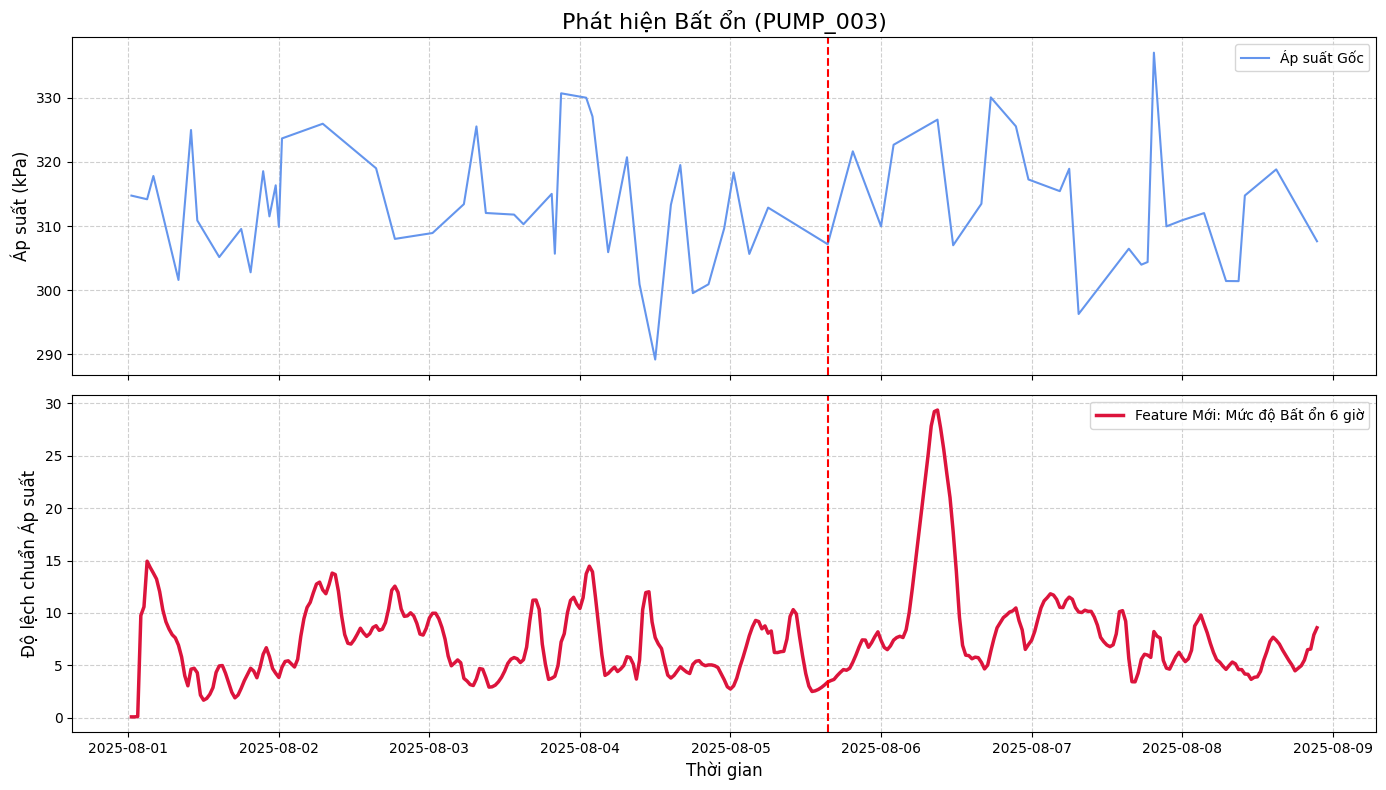

In [66]:
fig, axes = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

# Biểu đồ trên: Dữ liệu áp suất gốc
axes[0].plot(df_mach_viz['Timestamp'], df_mach_viz['Pressure'], 
             label='Áp suất Gốc', color='cornflowerblue')
axes[0].set_title(f'Phát hiện Bất ổn ({machine_to_plot})', fontsize=16)
axes[0].set_ylabel('Áp suất (kPa)', fontsize=12)
axes[0].legend()
axes[0].grid(True, linestyle='--', alpha=0.6)

# Biểu đồ dưới: Feature mới - Độ lệch chuẩn trượt
axes[1].plot(df_mach_viz['Timestamp'], df_mach_viz['pressure_rol_std_6h'], 
             label='Feature Mới: Mức độ Bất ổn 6 giờ', color='crimson', linewidth=2.5)
axes[1].set_ylabel('Độ lệch chuẩn Áp suất', fontsize=12)
axes[1].set_xlabel('Thời gian', fontsize=12)
axes[1].legend()
axes[1].grid(True, linestyle='--', alpha=0.6)

# Thêm một đường dọc để đánh dấu điểm hỏng hóc (nếu có trong dữ liệu viz)
failure_time = df_mach_viz[df_mach_viz['Failure'] == 1]['Timestamp'].min()
if pd.notna(failure_time):
    axes[0].axvline(x=failure_time, color='r', linestyle='--', label='Thời điểm Hỏng')
    axes[1].axvline(x=failure_time, color='r', linestyle='--', label='Thời điểm Hỏng')

plt.tight_layout()
plt.show()

## Model

In [67]:
df_featured.head()

,index,Timestamp,Temperature,Vibration,Pressure,Rotation_Speed,Machine_ID,Failure,temp_rol_mean_6h,pressure_rol_std_6h,temp_lag_1h,vib_lag_1h
0,0,2025-08-01 02:00:00,51.209811,1.043360,292.750822,1485.942812,PUMP_001,0,53.049339,10.937438,57.896064,2.383717
1,1,2025-08-01 02:30:00,50.599678,1.272244,292.897959,1486.708990,PUMP_001,0,52.780654,11.229054,51.209811,1.043360
2,2,2025-08-01 03:00:00,49.989545,1.501129,293.045096,1487.475168,PUMP_001,0,49.989545,15.773402,49.877724,2.177776
3,3,2025-08-01 03:30:00,49.379412,1.730013,293.192234,1488.241346,PUMP_001,0,48.676640,15.773402,49.877724,2.177776
4,4,2025-08-01 04:00:00,48.769279,1.958898,293.339371,1489.007524,PUMP_001,0,47.700335,14.443060,44.872063,2.368744


In [68]:
df_featured.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   index                1468 non-null   int64         
 1   Timestamp            1468 non-null   datetime64[ns]
 2   Temperature          1468 non-null   float64       
 3   Vibration            1468 non-null   float64       
 4   Pressure             1468 non-null   float64       
 5   Rotation_Speed       1468 non-null   float64       
 6   Machine_ID           1468 non-null   object        
 7   Failure              1468 non-null   int32         
 8   temp_rol_mean_6h     1468 non-null   float64       
 9   pressure_rol_std_6h  1468 non-null   float64       
 10  temp_lag_1h          1468 non-null   float64       
 11  vib_lag_1h           1468 non-null   float64       
dtypes: datetime64[ns](1), float64(8), int32(1), int64(1), object(1)
memory usage: 132.0+ KB


In [69]:
df_encoded = pd.get_dummies(df_featured, columns=['Machine_ID'], prefix='Machine')

In [70]:
X = df_encoded.drop(columns=['Failure', 'Timestamp'])
y = df_encoded['Failure']

In [71]:
split_point = int(len(X) * 0.8)


In [47]:
X_train = X[:split_point]
X_test = X[split_point:]
y_train = y[:split_point]
y_test = y[split_point:]

In [48]:
X_train.shape

(1174, 12)

In [49]:
X_test.shape

(294, 12)

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

In [53]:
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [54]:
y_pred = model.predict(X_test)

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       294

    accuracy                           1.00       294
   macro avg       1.00      1.00      1.00       294
weighted avg       1.00      1.00      1.00       294



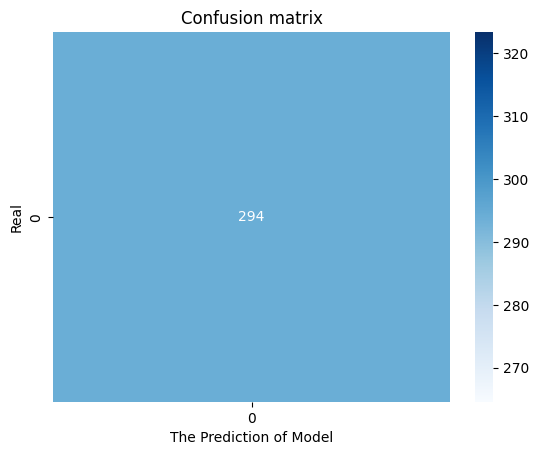

In [56]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("The Prediction of Model")
plt.ylabel("Real")
plt.title("Confusion matrix")
plt.show()

In [72]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import recall_score, precision_score
tscv = TimeSeriesSplit(n_splits=5)
model1 = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

In [73]:
recalls = []
precisions = []

In [78]:
fold = 1
for train_in, test_in in tscv.split(X):
    X_train1, X_test1 = X.iloc[train_in], X.iloc[test_in]
    y_train1, y_test1 = y.iloc[train_in], y.iloc[test_in]

    model1.fit(X_test1, y_test1)

    y_pred1 = model1.predict(X_test1)

    recall = recall_score(y_test1, y_pred1)
    precision = precision_score(y_test1, y_pred1, zero_division=0) # zero_division=0 để tránh lỗi nếu không có TP, FP
    recalls.append(recall)
    precisions.append(precision)

    print(f"--- Lần chạy (Fold) {fold} ---")
    print(f"Số mẫu Train: {len(X_train1)}, Số mẫu Test: {len(X_test1)}")
    print(f"Số lần hỏng hóc thực tế trong tập Test: {y_test1.sum()}")
    print(f"Recall: {recall:.2f}, Precision: {precision:.2f}")
    print("-" * 20)
    fold += 1

d:\python\Krish\mlproject\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\python\Krish\mlproject\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


--- Lần chạy (Fold) 1 ---
Số mẫu Train: 248, Số mẫu Test: 244
Số lần hỏng hóc thực tế trong tập Test: 0
Recall: 0.00, Precision: 0.00
--------------------
--- Lần chạy (Fold) 2 ---
Số mẫu Train: 492, Số mẫu Test: 244
Số lần hỏng hóc thực tế trong tập Test: 0
Recall: 0.00, Precision: 0.00
--------------------
--- Lần chạy (Fold) 3 ---
Số mẫu Train: 736, Số mẫu Test: 244
Số lần hỏng hóc thực tế trong tập Test: 8
Recall: 1.00, Precision: 1.00
--------------------
--- Lần chạy (Fold) 4 ---
Số mẫu Train: 980, Số mẫu Test: 244
Số lần hỏng hóc thực tế trong tập Test: 0
Recall: 0.00, Precision: 0.00
--------------------
--- Lần chạy (Fold) 5 ---
Số mẫu Train: 1224, Số mẫu Test: 244
Số lần hỏng hóc thực tế trong tập Test: 0
Recall: 0.00, Precision: 0.00
--------------------


d:\python\Krish\mlproject\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\python\Krish\mlproject\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [75]:
print(f"Recall trung bình sau 5 lần chạy: {np.mean(recalls):.2f}")
print(f"Precision trung bình sau 5 lần chạy: {np.mean(precisions):.2f}")

Recall trung bình sau 5 lần chạy: 0.20
Precision trung bình sau 5 lần chạy: 0.20


### Logistic Re

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler # **QUAN TRỌNG!**
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import recall_score, precision_score, classification_report
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
tscv = TimeSeriesSplit(n_splits=5)
model_lr = LogisticRegression(random_state=42, class_weight='balanced', penalty='l2', solver='liblinear')

In [82]:
recalls_lr = []
precisions_lr = []

In [84]:
# Tìm index của dòng đầu tiên có Failure = 1
first_failure_index = y[y == 1].index[0]

# Để đảm bảo toàn bộ "cụm" hỏng hóc nằm trong tập train, 
# chúng ta sẽ tìm index của dòng hỏng hóc cuối cùng
last_failure_index = y[y == 1].index[-1]

# Chúng ta sẽ đặt điểm chia ngay sau khi cụm hỏng hóc kết thúc
# Để cho tập test có kích thước hợp lý, chúng ta sẽ dùng một tỉ lệ, ví dụ 70/30
split_point = int(len(X_scaled) * 0.7)

# Đảm bảo rằng điểm chia nằm sau cụm hỏng hóc
if split_point <= last_failure_index:
    split_point = last_failure_index + 1

In [ ]:
X_train = X_scaled[:split_point]
X_test = X_scaled[split_point:]

y_train = y[:split_point]
y_test = y[split_point:]

print(f"So mau Train: {len(X_train)}, So mau Test: {len(X_test)}")
print(f"So lan hong hac trong tap Train: {y_train.sum()}")
print(f"So lan hong hac trong tap Test: {y_test.sum()}")

Số mẫu Train: 1027, Số mẫu Test: 441
Số lần hỏng hóc trong tập Train: 8
Số lần hỏng hóc trong tập Test: 0


In [ ]:
model_lr.fit(X_train, y_train)

# Dự đoán
y_pred = model_lr.predict(X_test)

# Đánh giá
print("\n--- BÁO CÁO KẾT QUẢ CUỐI CÙNG (LOGISTIC REGRESSION) ---")
# y_test co the khong co mau hong hoc, bao cao co the chi co lop 0
print(classification_report(y_test, y_pred, zero_division=0))


--- BÁO CÁO KẾT QUẢ CUỐI CÙNG (LOGISTIC REGRESSION) ---
              precision    recall  f1-score   support

           0       1.00      0.19      0.32       441
           1       0.00      0.00      0.00         0

    accuracy                           0.19       441
   macro avg       0.50      0.09      0.16       441
weighted avg       1.00      0.19      0.32       441



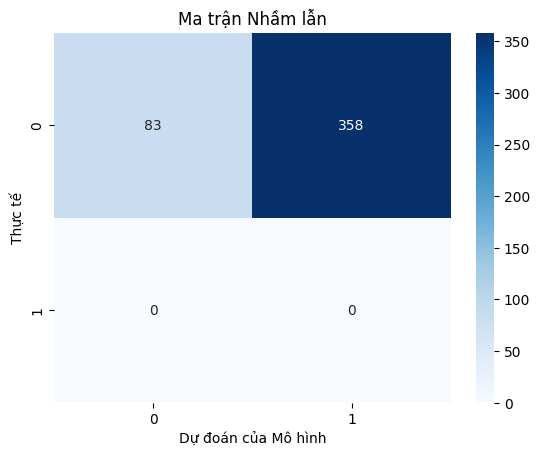

In [87]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Dự đoán của Mô hình')
plt.ylabel('Thực tế')
plt.title('Ma trận Nhầm lẫn')
plt.show()